## Day 51 - DIY Solution
**Q1. Problem Statement: K Means Clustering**<br>
Write a Python program that reads the Credit Card Customer Data.csv (provided on LMS) The following are the tasks that need to be taken into consideration while constructing the solution to Segregate customers based on the data provided with the help of k-means clustering
1.	Load the Given CSV file into a DataFrame
2.	Find missing values and drop the unnecessary columns 
3.	Univariate and bivariate analysis
4.	Standardize the whole dataset
5.	Find the within-cluster sum of square
6.	Find silhouette score
7.	Use a line plot using matplotlib to find scores for different sizes of K and choose the best size for the cluster and build the final model
8.	Observe Cluster behavior with different columns.
Print Co-ordinates of all centroids and silhouette scores for the final model


**Step-1:** Importing Libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # for better interactive plotting
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler #to standardise the data
from sklearn.metrics import silhouette_score #for evaluation of model
import warnings
warnings.filterwarnings('ignore')

**Step-2:**  Load the CSV file in to a DataFrame

In [ ]:
df = pd.read_csv('Credit Card Customer Data.csv')
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


**Step-3:** Check the data types for variables

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [ ]:
df.columns # total columns lsit of data frame

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

**Find missing values and drop the unnecessary columns**

**Step-4:** Missing Value analysis.

In [ ]:
df.isnull().sum() #no missing value has found

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

**Step-5:** Drop unnecessary column.

In [ ]:
df.drop(columns=['Sl_No', 'Customer Key'],inplace=True) 

**Step-6:** Univariate analysis

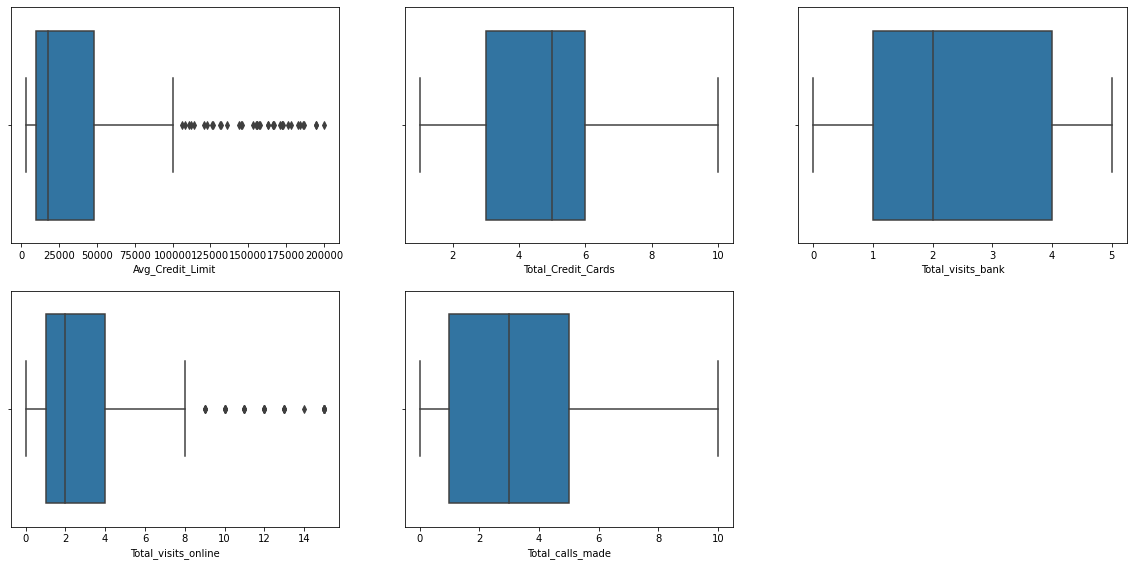

In [ ]:
i=1
plt.figure(figsize=(20,20))
for j in df.columns:
    plt.subplot(4,3,i)
    sns.boxplot(data=df,x=j)
    i+=1

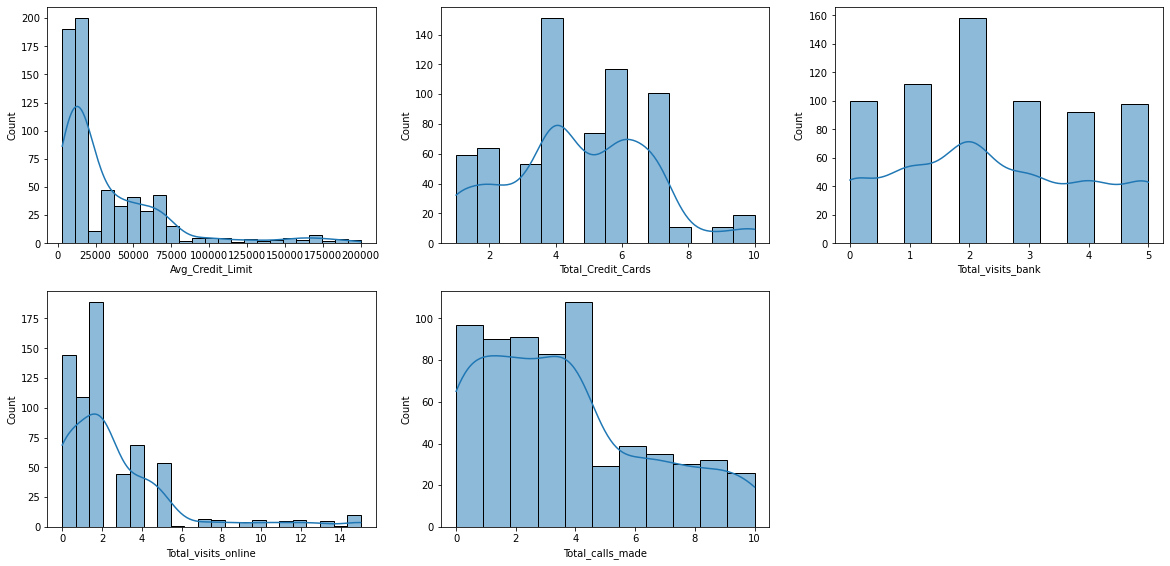

In [ ]:
i=1
plt.figure(figsize=(20,20))
for j in df.columns:
    plt.subplot(4,3,i)
    sns.histplot(data=df,x=df[j],kde=True)
    i+=1

 Here we have some outlier but we dont remove it due to the loss of data

**Step-7:** Bivariate analysis

In [ ]:
df.corr() # correlation matrix

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


<AxesSubplot:>

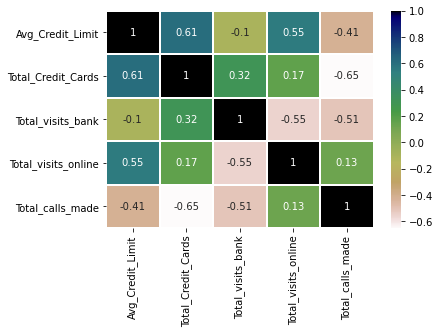

In [ ]:
sns.heatmap(df.corr(),cmap='gist_earth_r',linewidths=1,annot=True)# corelation matrix with heat mape

1- avg_credit_limit and total_credit_cards has the high +ve correlation of 0.61..<br>                                             2- avg_credit_limit and total_visits_online has the high +ve correlation of 0.55..<br>                                             3-total_credit_card and total_calls_made has the high -ve correlation of -0.65....<br>
4-total_visit_bank and total_visit_online has high -ve correlation of -0.55....<br>                                                 5-total_calls_made and total_visit_bank has high -ve correlation of -0.51.....<br>

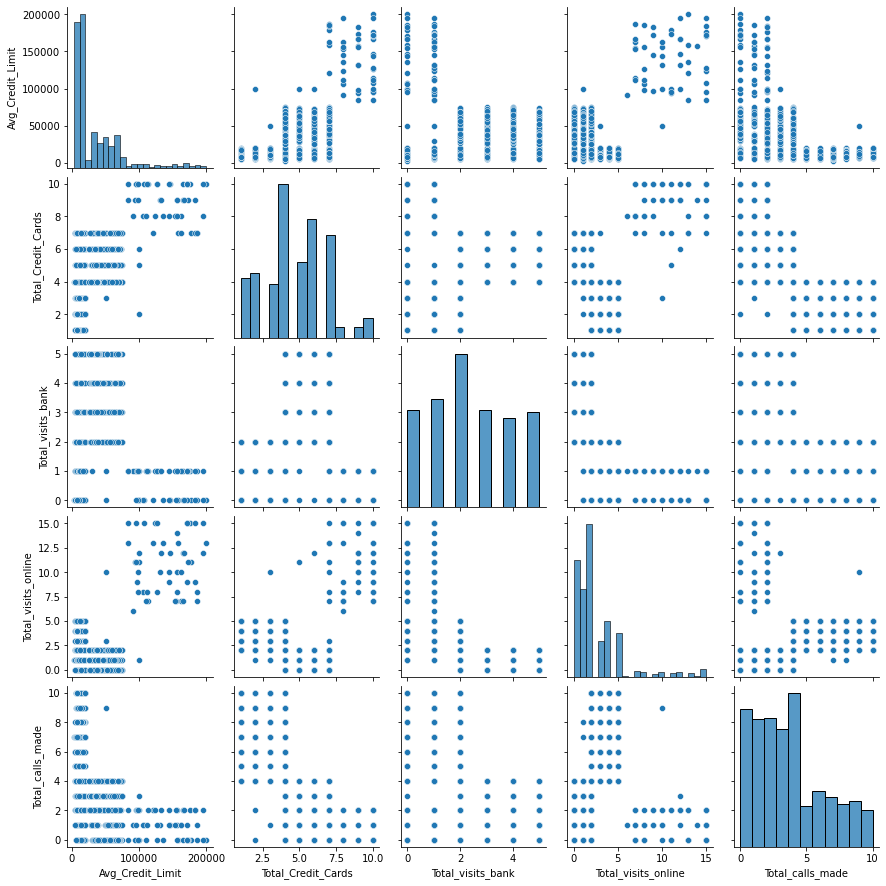

In [ ]:
sns.pairplot(df) #pair plot of numeric columns

**Step-8:** Standardize the whole dataset

In [ ]:
sc=StandardScaler()# scaling of data
scaled=sc.fit_transform(df)
scaled_data=pd.DataFrame(scaled,columns=df.columns)
scaled_data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


**Step-9:** Find Within-Cluster Sum of Square

In [ ]:
wcss=[]
for i in range(1,13):
    km=KMeans(n_clusters=i)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

**Step-10:** Find silhouette score

In [ ]:
slh_score=[]
for i in range(2,13):
    km=KMeans(n_clusters=i)
    km.fit(df)
    slh_score.append(silhouette_score(scaled_data,km.labels_))

**Use a line plot using matplotlib to find scores for different sizes of K and choose the best size for the cluster and build the final model**

**Step-11:** Plot all score for all model for diffrent clusters sizes  

Text(0.5, 0, 'k-value')

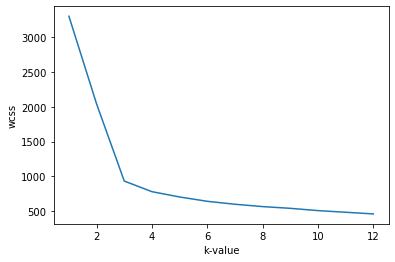

In [ ]:
plt.plot(range(1,13),wcss)
plt.ylabel('wcss')
plt.xlabel('k-value')

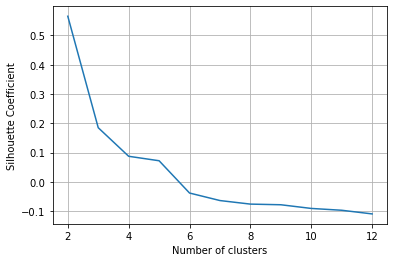

In [ ]:
plt.plot(range(2,13),slh_score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

Here we have choose k- value such that wcss is minimum and silihoutte coefficint is more so we choose k=3

**Step-12:** Build final model.

In [ ]:
km1=KMeans(n_clusters=3)
km1.fit(scaled_data)
y=km1.predict(scaled_data)
df['label']=y

**Step-13:** Observe Cluster behavior with different columns. .

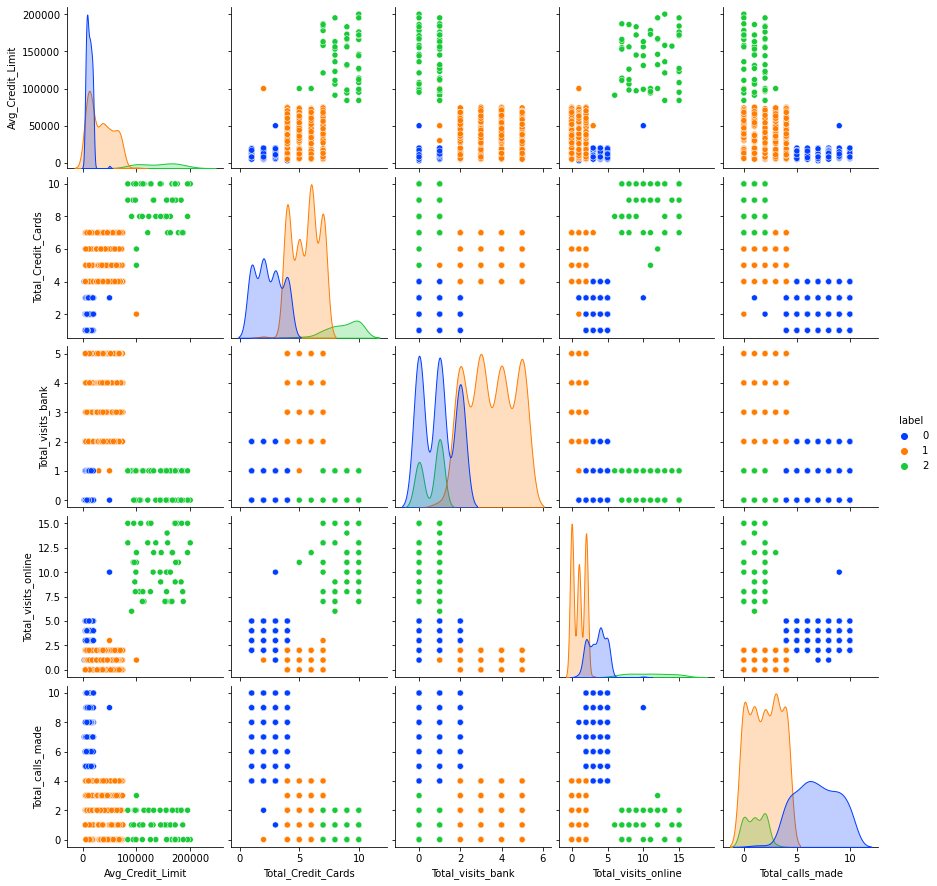

In [ ]:
#custer wise data presentation for each column
sns.pairplot(df,hue='label',palette='bright')

**Step-14:** Print Co-ordinates of all centeroids.

In [ ]:
center=km1.cluster_centers_# centre of clustering 
center# center coordinated for each cluster centroid.

array([[-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

**Step-15:** Print silhouette_score for final model.

In [ ]:
Kmean_silihoute=silhouette_score(scaled_data,km1.labels_)
Kmean_silihoute # silihoute score for our final model.

0.5157182558881063


**Inference:** Our goal was to cluster our data with each other so we can eassily identify their type and we can give appropriate service to them, and by using clustering algorithm we observed that catagories group of 3 K -means perform best.and we also observe some general observation like ,

**segment-0:**total_credit_card[4-6] and avg_credit_limit(0-75000)----   
**segment-1:**total_credit_card(0-3) and avg_credit_limit(0-25000)----<br>
**segment-2:**total_credit_card(6-10) and avg_credit_limit>75000 -----<br>
we can observe that higher the avg_credit_limit higher is total_credit_card aquired by customer<br>








